## 1. Hashing

<br>

* Download the datasets [here](https://drive.google.com/file/d/19SD2db0dH2A0QLJOmBHnkbqOX6SbERcY/view?usp=sharing). You will find a `hash.txt` file.
<br>

1. Implement your hash functions from scratch, no ready-made hash functions are allowed. Read the class material and search the internet if you need to. As a reference, it may be useful to look at the description of hash functions in the [book](http://www.mmds.org/) or [here](http://aris.me/contents/teaching/data-mining-ds-2020/resources/DPV-universal-hashing.pdf).
<br>

2. Use your hash function, implement a HyperLogLog structure.
<br>

3. Read the dataset sequentially and add it to your HyperLogLog.
<br>

4. At the end you have to provide:
    * The cardinality of the dataset.
    * The error of your filter.

**Comments:**


Importing the libraries to work with arrays and math operation as the square root.

Importing `hashing_functions` module that contains our functions for this question.

In [4]:
import numpy as np
import math
import hashing_functions

Here we have created a custom function called `zaa` that is responsible for choose a size of the vector, and as output we have the hashing key and the number of zeros. 
<br>


The function is used inside the function `part_hill` that receives an array which contains the hash keys and the counted number of zeros. The proocedure is to create the buckets using the hashkeys and save the respective values without collision treatment. As an output this fuction give the sum of the number of zeros of the array and also the number of buckets.


<br>


The function `part_hill` has been used inside the function `split_data` which is responsible to split the huge amount of data we need to treat, apply the algorithm in part of it and then sum all the partial results from the function `part_hill` and give as an output the result of the probably **cardinality** of the data and the respective **error**.

<br>
<br>


For more info please read the docstrings of `hashing_functions.py` file.

In [2]:
f = open("hash.txt")
f = f.readlines()
[cardinality,error] = hashing_functions.split_data(f)

Cardinality: 173554702
Error: 1.2327952679426826


---------

## 2. Clustering
<br>

We play with a dataset gathering reviews ($\sim$	560k) of [fine foods from Amazon](https://www.kaggle.com/snap/amazon-fine-food-reviews). The reviews include much information. We focus on the reviews' plain text and try to cluster the products ($\sim$	74).


To solve this task, you must:


1. Implement the k-means clustering algorithm (not ++: random initialization). We ask you to write the algorithm from scratch following what you learned in class.
<br>

2. Run the algorithm on the food data. Then, use the already implemented version of k-means++, are there any differences in results?
<br>

3. Analyse the obtained clusters:

    * Identify the kind of products in the cluster (e.g., chips, tea, coffee) using a visualization called word cloud.
    * Provide the number of product in each cluster
    * Compute the reviews' score distribution in each cluster. Once you get them, test if their mean differences are statistically significant!
    * Get the number of unique users writing reviews in each cluster
    
<br>
<br>
<br>
   
Before running the algorithm, you should consider the following:
<br>

* How do you represent the data? (e.g., do I use a binary representation or TF-IDF?)
<br>

* How do you pre-process data? Since you aim to characterize products by their review, do you want to consider words that appear in too many or too few documents?
<br>

* After organizing your data, you will realize that tens of thousands of words compose your vocabulary. In this case, we suggest you to use the SVD method to reduce the dimensionality of the dataset. This operation is typically used to denoise the data and implies the loss of some information. For this reason, you first reduce your dataset to a few hundred components (e.g., 100). Then, you use the following np.cumsum(explained_variance_ratio_) to verify the total amount of variance you retain with an increasing number of components. You can pick a number of components that retain> 60% of the variance. Since we know this point can raise many questions, opening a thread on Slack is recommended and welcomed.
<br>

* The choice of the number of clusters should not be random.
<br>
<br>

**IMPORTANT**: We are aware that you may consult the internet for information about implementing the requested algorithms. However, the final code must be yours! So please, do not search and copy-paste the code.


**Comments:**

Importing all the necessary libraries

In [ ]:
from sklearn.decomposition import TruncatedSVD

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk import stem

from nltk.stem import WordNetLemmatizer 
from collections import defaultdict 

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 
from numpy import linalg
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
from collections import Counter,OrderedDict

from scipy import stats

Also importing our custom functions from `clustering_functions.py`

In [ ]:
import clustering_functions

Reading the `Reviews.csv` file

In [ ]:
dataset = pd.read_csv('Reviews.csv')

Some preprocessing work on the dataset is needed.

In [ ]:
dataset['ProfileName'].fillna('', inplace=True)
dataset['Summary'].fillna('', inplace=True)
dataset.set_index('Id', inplace=True)
dataset['Datetime'] = dataset.Time.apply(lambda value: pd.to_datetime(value, unit='s'))

Applying the `clean_text` function to the Text and write the result in a new columns

In [ ]:
from clustering_functions import clean_text
dataset['Cleaned_Text'] = dataset['Text'].apply(clean_text)

Getting tf-idf matrix using fit_transform function.

In [ ]:
vectorizer = TfidfVectorizer(
                        strip_accents='unicode',
                        lowercase =True, analyzer='word', token_pattern=r'\w+',
                        use_idf=True, smooth_idf=True, sublinear_tf=True, 
                        stop_words = 'english') 

Tfidf_matrix = vectorizer.fit(dataset['Cleaned_Text'].values.astype('U'))

Reducing the number of columns to 500

In [ ]:
Trunc_svd = TruncatedSVD(n_components= 500) 
input_matrix = Trunc_svd.fit_transform(Tfidf_matrix.transform(dataset['Cleaned_Text']))

This is a built in elbow method to see the correct value of k

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


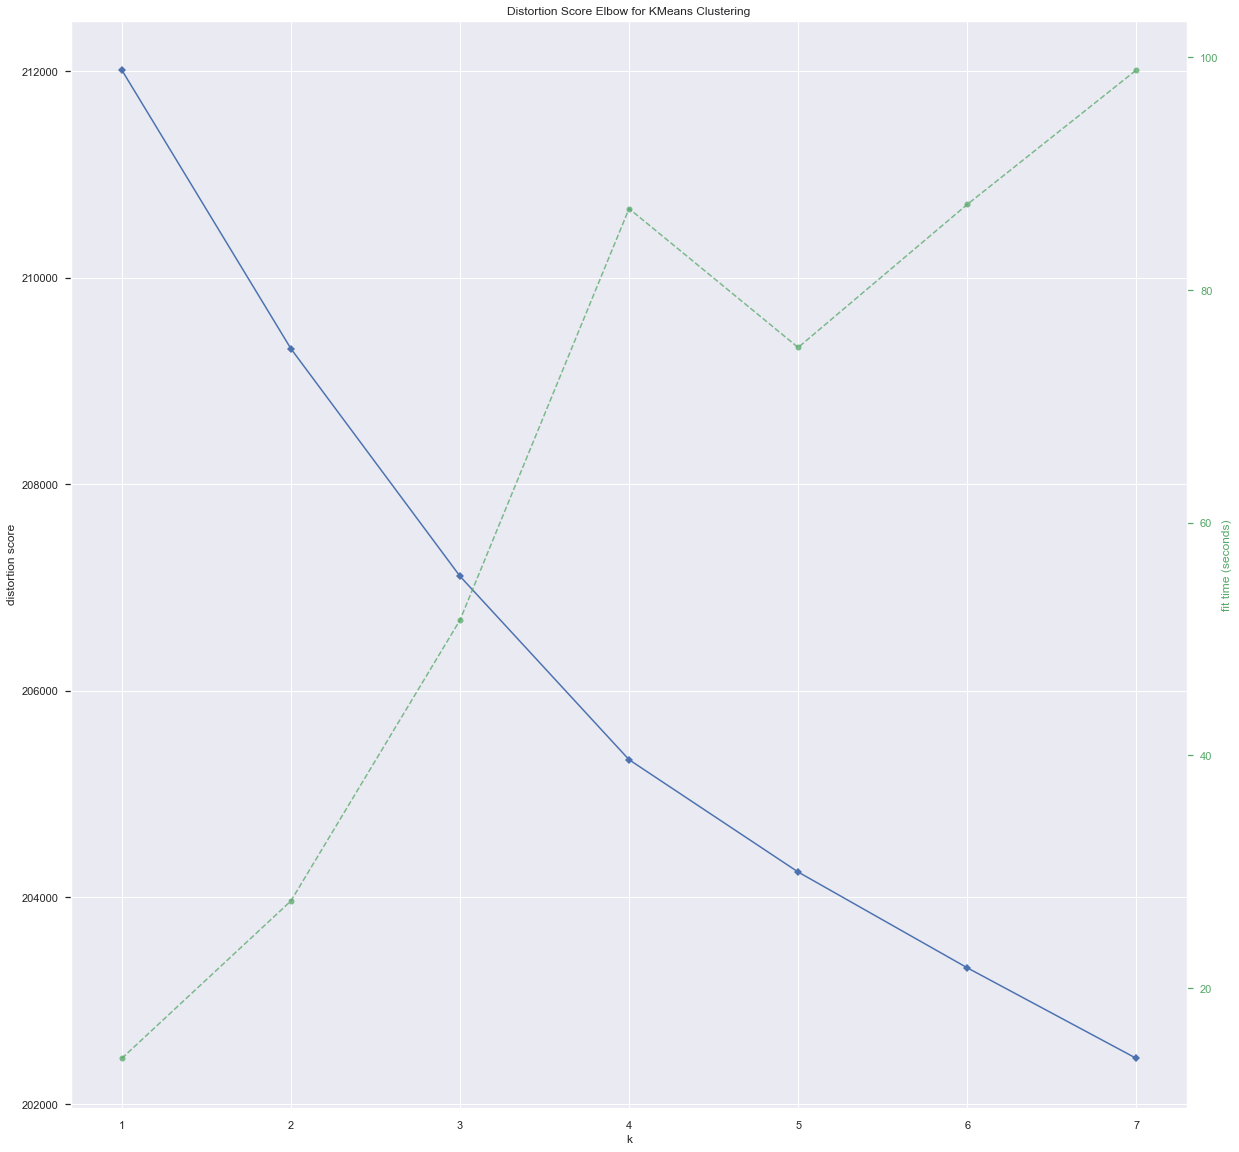

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [681]:
model_in_built = KMeans()
visualizer = KElbowVisualizer(model_in_built, k=(1,8))

visualizer.fit(input_matrix)        
visualizer.show()        

**Comments:**

According to this graph the best value of k is 4, even if from the informations that we got from the cluster analysis, 
3 is a good value too. We will use it to demonstrate how the algorithm works.

Here we import our custom class `K_means` to perform the clustering

In [ ]:
from clustering_functions import K_means

**Comments:**

If we run the original KMeans algorithm we obtain the same result, but in our case the result often depends on the initial value of the centroid, that's why we have to set the seed before we build the model. Obviously choosing properly the centroids the algorithm will be faster and more accurate. 

First, we set the seed to replicate the result, and build the model

In [ ]:
np.random.seed(20)
model=K_means(3)
model.clustering(input_matrix)

In [663]:
model.cluster

array([0., 0., 0., ..., 0., 0., 0.])

PCA Analysis

In [748]:
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(input_matrix)

pca_comp= pd.DataFrame(data=scatter_plot_points, columns=('x','y'))
pca_comp['Cluster']= model.cluster # add the cluster labels as a column to allow the algorithm to color the points 

Plotting the matrix in 2D 

<AxesSubplot:xlabel='x', ylabel='y'>

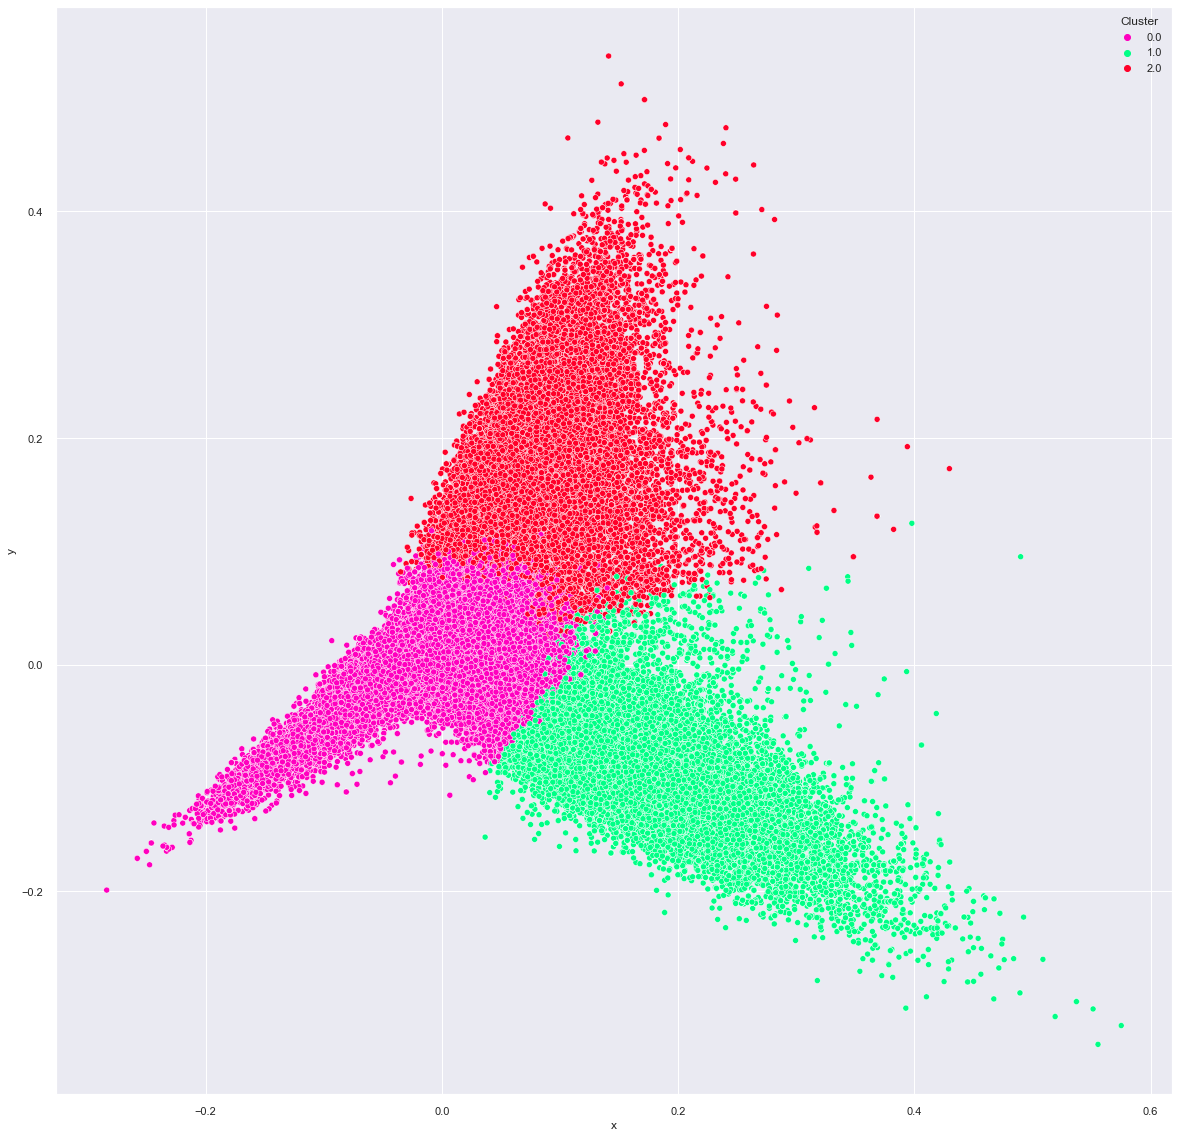

In [749]:
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(data=pca_comp,x='x',y='y',markers='x',hue='Cluster',palette = "gist_rainbow_r")

**Comments:**

For the following cluster analysis we chose to use the real KMean algorithm to obtain the best clusters and to perform the analysis over reliable data. We chose 4 as number of cluster, but two cluster seems to be very similar.

## Cluster Analysis

In [750]:
model = KMeans(n_clusters=4,init='k-means++')
model.fit(input_matrix)

KMeans(n_clusters=4)

<AxesSubplot:xlabel='x', ylabel='y'>

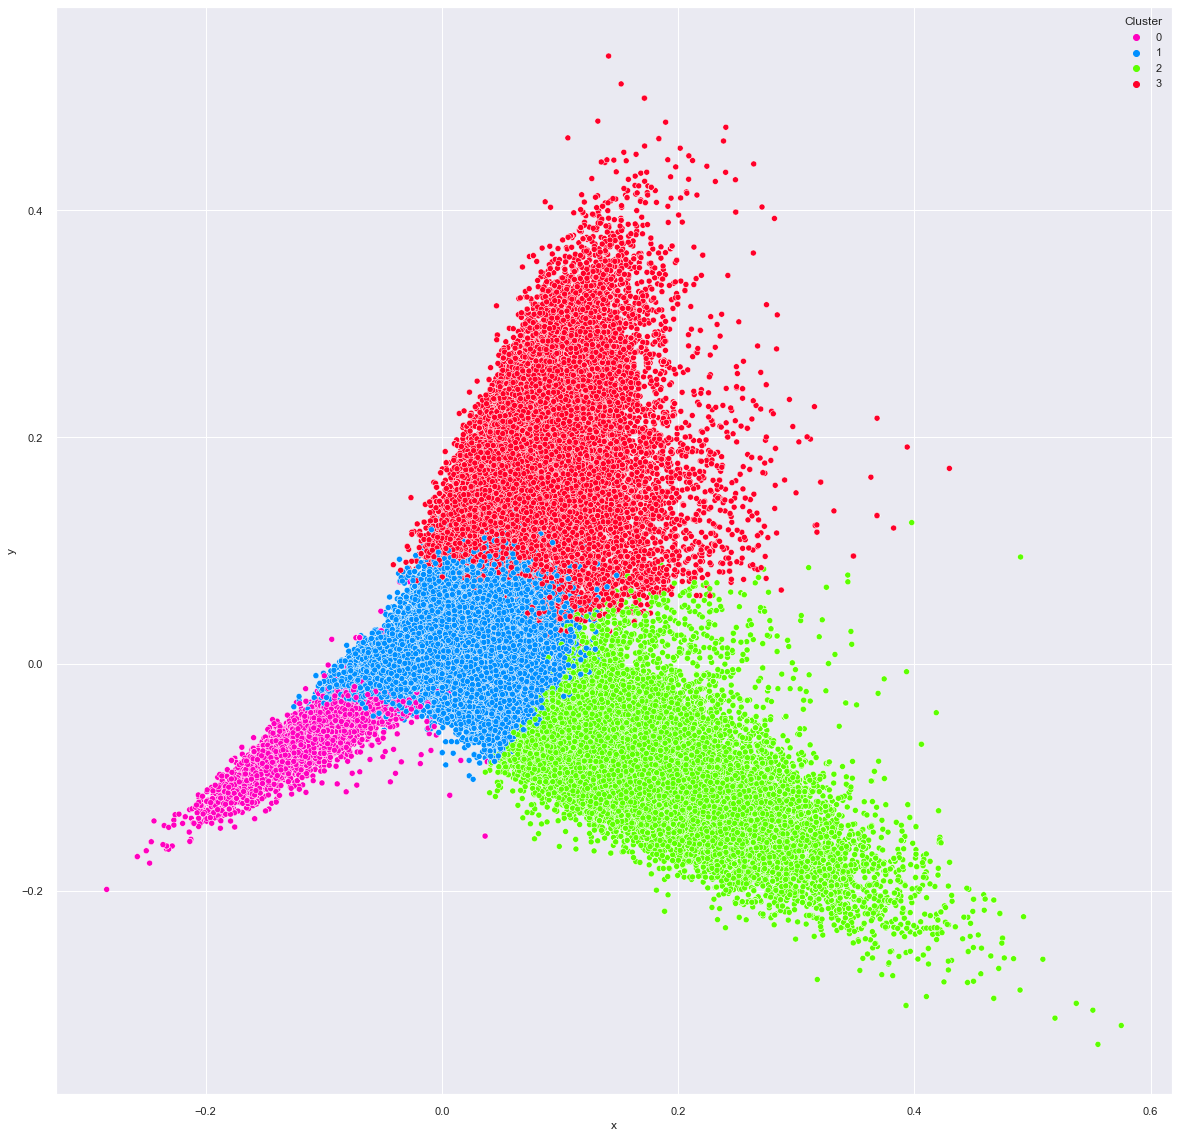

In [758]:
#PCA Analysis
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(input_matrix)

pca_comp= pd.DataFrame(data=scatter_plot_points, columns=('x','y'))
pca_comp['Cluster']= model.labels_ 
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(data=pca_comp,x='x',y='y',markers='x',hue='Cluster',palette = "gist_rainbow_r")

Here, we add the cluster labels to the rows and define a new dataframe for each cluster

Then, getting the number of products of each cluster

In [ ]:
dataset['Clusters']=model.labels_  #add the cluster labels to the rows 

#define a new dataframe for each cluster 
cluster_1= dataset[dataset.Clusters==0]
cluster_2= dataset[dataset.Clusters==1]
cluster_3= dataset[dataset.Clusters==2]
cluster_4= dataset[dataset.Clusters==3]

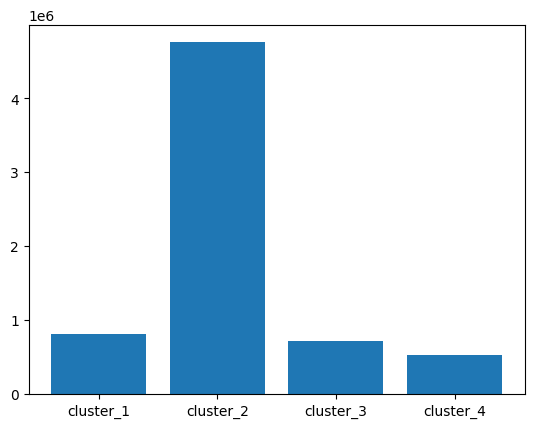

[809916, 4761432, 716568, 533532]


<Figure size 800x800 with 0 Axes>

In [819]:
#get the number of products of each cluster
cluster_cardinality=[]
for i in range(1,5):
    cluster=eval('cluster_{}'.format(i))
    cluster_cardinality.append(cluster.size)
plt.bar(['cluster_1','cluster_2','cluster_3','cluster_4'],cluster_cardinality) 

plt.show()
plt.figure(figsize=(8,8))
print(cluster_cardinality)

**Comments:**

On the graph above, we'll see that the second cluster has the highest number of products.

Visualizing the words using `wordcloud`

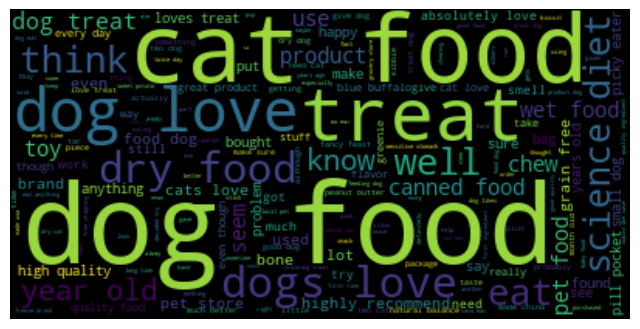

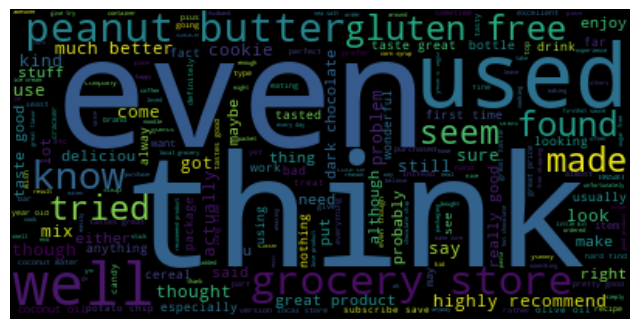

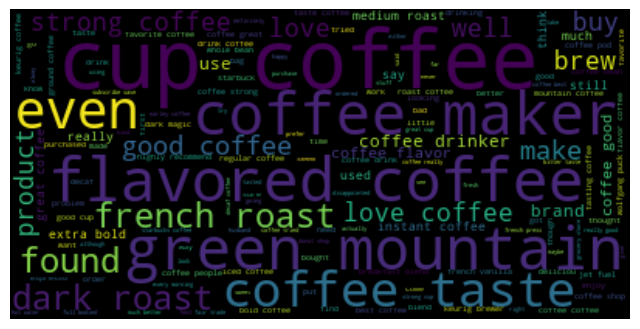

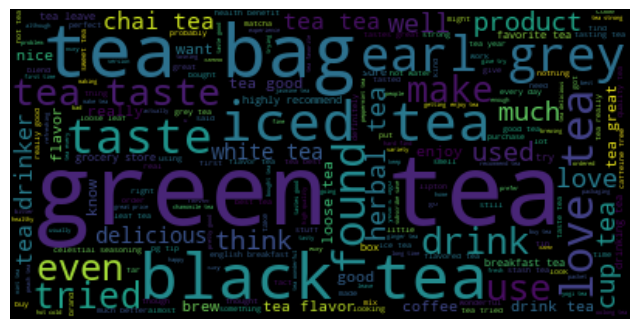

In [824]:
for i in range(1,5):
    cluster=eval('cluster_{}'.format(i))
    reviews = " ".join(review for review in cluster.Cleaned_Text) # create a unique string for all the CleanedText strings
    wordcloud = WordCloud().generate(reviews)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

**Comments:**

The first cluster is about animals, the second is about grocery stores and the second and the third are about drinks. They seems to be very similar.

For each cluster we get the score distributon, and count the number of occurences of each value and store it into a OrderedDict.

In [855]:
# geting the score distributon
score_dist_1=cluster_1.Score.values
score_dist_2=cluster_2.Score.values
score_dist_3=cluster_3.Score.values
score_dist_4=cluster_4.Score.values

#counting the number of occurences storing them
dic_1=OrderedDict(sorted(Counter(score_dist_1).items()))
dic_2=OrderedDict(sorted(Counter(score_dist_2).items()))
dic_3=OrderedDict(sorted(Counter(score_dist_3).items()))
dic_4=OrderedDict(sorted(Counter(score_dist_4).items()))

Let's check the results by visualization.

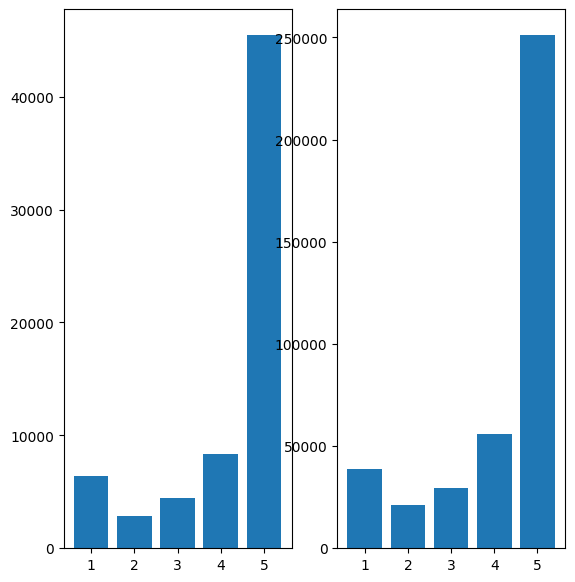

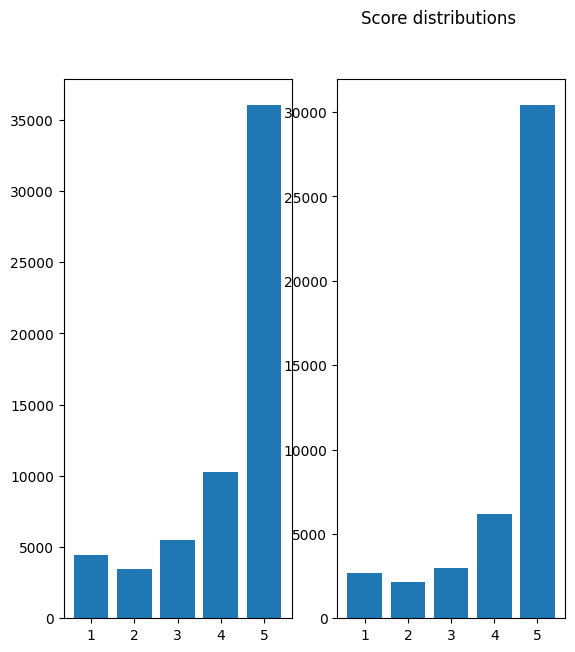

In [865]:
names=['1','2','3','4','5']

plt.figure(1,figsize=(10, 7))

plt.subplot(131)
plt.bar(names, list(dic_1.values()), align='center')
plt.subplot(132)
plt.bar(names, list(dic_2.values()), align='center')
plt.figure(2,figsize=(10, 7))
plt.subplot(131)
plt.bar(names, list(dic_3.values()), align='center')
plt.subplot(132)
plt.bar(names, list(dic_4.values()), align='center')
plt.suptitle('Score distributions')
plt.show()

**Comments:**

The datasets have similar score distributions, with an high number of '5'

Then we count the number of users of each cluster

[26041, 200272, 28356, 23589]


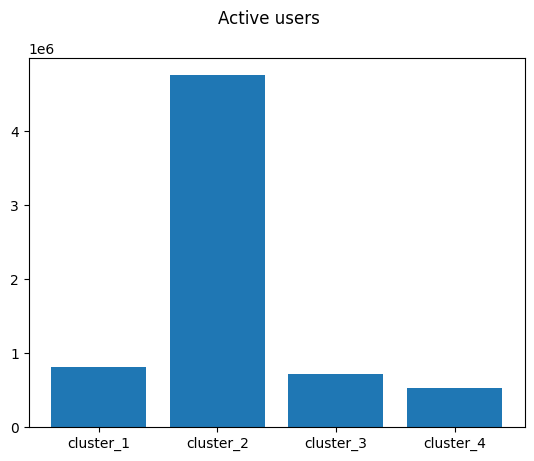

In [866]:
# counting the number of users of each cluster
cluster_users_cardinality=[]
for i in range(1,5):
    cluster=eval('cluster_{}'.format(i))
    cluster_users_cardinality.append(cluster.UserId.nunique()) # count each user only once
plt.bar(['cluster_1','cluster_2','cluster_3','cluster_4'],cluster_cardinality)
plt.suptitle('Active users')
print(cluster_users_cardinality)

**Comments:**

We expected to see this result because the second cluster is also the one with the highest number of products

Here we use our custom function `T_test_score_distribution` to perform the T-test for the means.

In [ ]:
from clustering_functions import T_test_score_distribution

In [881]:
T_test_score_distribution(cluster_1,cluster_2)

They are statistically different
They are statistically different


In [882]:
T_test_score_distribution(cluster_2,cluster_3)

They are statistically equal
They are statistically equal


In [883]:
T_test_score_distribution(cluster_3,cluster_4)

They are statistically equal
They are statistically equal


In [884]:
T_test_score_distribution(cluster_1,cluster_3)

They are statistically different
They are statistically different


In [887]:
T_test_score_distribution(cluster_1,cluster_4)

They are statistically equal
They are statistically equal


In [886]:
T_test_score_distribution(cluster_2,cluster_4)

They are statistically equal
They are statistically equal


## 3. Algorithmic question
<br>

You are given an array with A with n integer numbers.
<br>

* Let s = min{ A[1], ..., A[n] } and b = max { A[1], ..., A[n] }.
<br>

* Let r = b - s
<br>

Prove that we can sort A in time O(n + r).

**Comments:**

The code below is a sorting algorithm that works in time O(n+r), where r= max(arr)-min(arr). It is the Counting Sort.
The code is available at this [link](https://www.geeksforgeeks.org/counting-sort/).



We will use this example to prove its time complexity.

In [ ]:
def count_sort(arr): 
    max_element = int(max(arr)) 
    min_element = int(min(arr)) 
    range_of_elements = max_element - min_element + 1
    # Create a count array to store count of individual 
    # elements and initialize count array as 0 
    count_arr = [0 for _ in range(range_of_elements)] 
    output_arr = [0 for _ in range(len(arr))] 
  
    # Store count of each character 
    for i in range(0, len(arr)): 
        count_arr[arr[i]-min_element] += 1
  
    # Change count_arr[i] so that count_arr[i] now contains actual 
    # position of this element in output array 
    for i in range(1, len(count_arr)): 
        count_arr[i] += count_arr[i-1] 
  
    # Build the output character array 
    for i in range(len(arr)-1, -1, -1): 
        output_arr[count_arr[arr[i] - min_element] - 1] = arr[i] 
        count_arr[arr[i] - min_element] -= 1
  
    # Copy the output array to arr, so that arr now 
    # contains sorted characters 

        arr[i] = output_arr[i] 
  
    return arr 
  


**Comments:**

First two arrays are initialized. The first one has length r and the second one has length n, assuming n as the length of the input array, and r as the range between the maximum and minimum values of the input array.Then there are three for loops, in which there are the most executed operations. So we have to study them to see the time complexity of the algorithm. In the first loop there is only one command that has costant time complexity. This command is executed n times.  The second loop has another costant operation that is executed r times. In the final loop there are three costant operations that are repeated n times. Finally we can say that the algorithm time complexity is n+3n+r, that become O(n+r), with the "Big O" notation.